# Quickstart

A few minutes to `cell-neighbors`

### Import libraries

In [39]:
import cell_neighbors as cn
import scanpy as sc
import cellplots as cp
import matplotlib.pyplot as plt
import adata_query
import numpy as np

from typing import List

### Fetch some tutorial data from `scanpy`

In [40]:
adata = sc.datasets.pbmc3k_processed()
print(adata)

AnnData object with n_obs × n_vars = 2638 × 1838
    obs: 'n_genes', 'percent_mito', 'n_counts', 'louvain'
    var: 'n_cells'
    uns: 'draw_graph', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_tsne', 'X_umap', 'X_draw_graph_fr'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'


### Viz funcs

In [71]:
def _autoplot() -> [plt.Figure, List[plt.Axes]]:
    return cp.plot(1, 1, height=0.85, width=0.85, delete="all", del_xy_ticks=[True])

def plot_connecting_line(ax, line, zorder=111, c="k", lw=0.25, **kwargs):
    ax.plot(line[:, 0], line[:, 1], zorder=zorder, c=c, lw=lw, **kwargs)
    
colors = [
    "#448aff",
    "#1565c0",
    "#009688",
    "#8bc34a",
    "#ffc107",
    "#ff9800",
    "#f44336",
    "#ad1457",
]

cmap = {
    celltype: colors[en] for en, celltype in enumerate(adata.obs["louvain"].unique())
}

### Split into test and train, query

In [72]:
X_umap = adata.obsm["X_umap"]
full_idx = adata.obs.index

train_idx = adata.obs.sample(frac=0.9).index
test_idx = [idx for idx in full_idx if not idx in train_idx]
adata_train = adata[train_idx].copy()
adata_test = adata[test_idx].copy()

X_train = adata_query.fetch(adata_train, key="X_pca")
X_test = adata_query.fetch(adata_test, key="X_pca")

In [73]:
knn_graph = cn.kNN(adata_train, use_key="X_pca")

In [91]:
idx = np.random.choice(range(len(test_idx)))

xq = adata[test_idx[idx]].obsm["X_umap"].toarray()
nn = knn_graph.query(X_test[idx][None, :]).flatten()
xu_nn = adata_train[nn].obsm["X_umap"].toarray()
nn_c = adata_train[nn].obs["louvain"].map(cmap)

X_query shape: (1, 50)


### Plot query

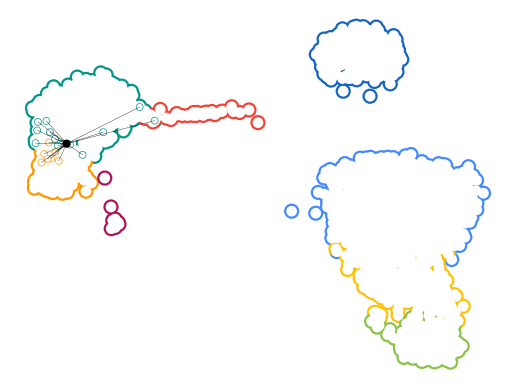

In [92]:
axes = cp.umap_manifold(adata, groupby="louvain", c_background=cmap)
axes[0].scatter(
    xu_nn[:, 0], xu_nn[:, 1], ec=nn_c, s=25, fc="w", zorder=102, linewidth=0.5
)
axes[0].scatter(xq[:, 0], xq[:, 1], c="k", s=35, ec="None", zorder=103)
lines = [np.vstack([xu_nn_i, xq]) for xu_nn_i in xu_nn]
_ = [plot_connecting_line(axes[0], line) for line in lines]